# **Bike Demand Prediction using Multiple Linear Regression**

## **1. Introduction**
### **1.1. Problem Statement**
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To recover and prepare for post-pandemic demand, the company seeks to understand the factors affecting bike demand in the American market. By identifying significant predictors of demand and analyzing their impact, BoomBikes aims to optimize business strategies, meet customer needs, and gain a competitive edge.

- I am required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## **2. Data Understanding**
### **2.1. Import necessary libraries**

In [204]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

# Pandas by default doesn't display all the columns in the dataframe
# As we're going to work on a large dataset, the following setting will help read data from all the columns
pd.set_option('display.max_columns', None)

# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# For some of the columns we may have to see the data from all rows
# Eg: Categorical columns.
pd.set_option('display.max_rows', None)

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 


### **2.2. Data Overview**

In [205]:
# Load the data from day.csv file. 
# Using the read_csv function from the pandas library, we can load the data from the csv to a pandas dataframe.
df = pd.read_csv('Data/day.csv')

# Shape property of the pandas dataframe returns the dimention of the dataframe
# The return value will contain the number of rows and columns in the dataframe
df.shape

# Quick observation
#-------------------
# 1. There are 730 rows and
# 2. There are 16 columns
#-------------------

(730, 16)

In [206]:
# Take a quick look at the first 5 rows of data to get an understanding
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [207]:
df.info()

# Quick observation
#-------------------
# 1. There are no null values across the dataset
# 2. Most of the columns are numeric
#-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [208]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


In [209]:
# Pandas dataframe object offers `nunique` function which give the number of unique elements in each column
df.nunique().sort_values(ascending=False)

# Information from the data dictionary
# -------------------------------------
# - instant: record index
# - dteday : date
# - season : season (1:spring, 2:summer, 3:fall, 4:winter)
# - yr : year (0: 2018, 1:2019)
# - mnth : month ( 1 to 12)
# - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit : 
# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : temperature in Celsius
# - atemp: feeling temperature in Celsius
# - hum: humidity
# - windspeed: wind speed
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

instant       730
dteday        730
cnt           695
atemp         689
registered    678
windspeed     649
casual        605
hum           594
temp          498
mnth           12
weekday         7
season          4
weathersit      3
yr              2
holiday         2
workingday      2
dtype: int64

## **3. Data Preparation**
### **3.1. Data Cleaning**
- There are no null or missing values. Hence data cleaning isn't required
- We can drop 'instant' and 'dteday' columns as they both are either not useful or the information is in other columns

In [210]:
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


### **3.2. Data Transformation**
- Convert categorical numeric variables (e.g., `season`, `weathersit`) into string categories.


In [211]:
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [212]:
dict_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dict_yr = {0: 2018, 1: 2019}
dict_mnth = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dict_holiday = {0: 'Not a holiday', 1: 'Holiday'}
dict_weekday = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
dict_workingday = {0: 'Not a working day', 1: 'Working day'}
dict_weathersit = {1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Snow/Fog'}

In [213]:
column_to_dict = {
    'season': dict_season,
    'yr': dict_yr,
    'mnth': dict_mnth,
    'holiday': dict_holiday,
    'weekday': dict_weekday,
    'workingday': dict_workingday,
    'weathersit': dict_weathersit
}

for col in cat_columns:
    df[col] = df[col].map(column_to_dict[col])
    
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,Not a holiday,Sat,Not a working day,Mist/Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,2018,Jan,Not a holiday,Sun,Not a working day,Mist/Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,2018,Jan,Not a holiday,Mon,Working day,Clear/Partly Cloudy,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,2018,Jan,Not a holiday,Tue,Working day,Clear/Partly Cloudy,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,2018,Jan,Not a holiday,Wed,Working day,Clear/Partly Cloudy,9.31,11.46,43.70,12.52,82,1518,1600


In [214]:
# Order the categorical variables based on their keys

df['season'] = pd.Categorical(df['season'], categories=list(dict_season.values()), ordered=True)
df['yr'] = pd.Categorical(df['yr'], categories=list(dict_yr.values()), ordered=True)
df['mnth'] = pd.Categorical(df['mnth'], categories=list(dict_mnth.values()), ordered=True)
df['holiday'] = pd.Categorical(df['holiday'], categories=list(dict_holiday.values()), ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], categories=list(dict_weekday.values()), ordered=True)
df['workingday'] = pd.Categorical(df['workingday'], categories=list(dict_workingday.values()), ordered=True)
df['weathersit'] = pd.Categorical(df['weathersit'], categories=list(dict_weathersit.values()), ordered=True)

In [215]:
df[cat_columns] = df[cat_columns].astype('category')
df.select_dtypes('category').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 6.6 KB


## **4. Exploratory Data Analysis (EDA)**
### **4.1 Univariate Analysis**
- Visualize distributions of key numerical and categorical features.

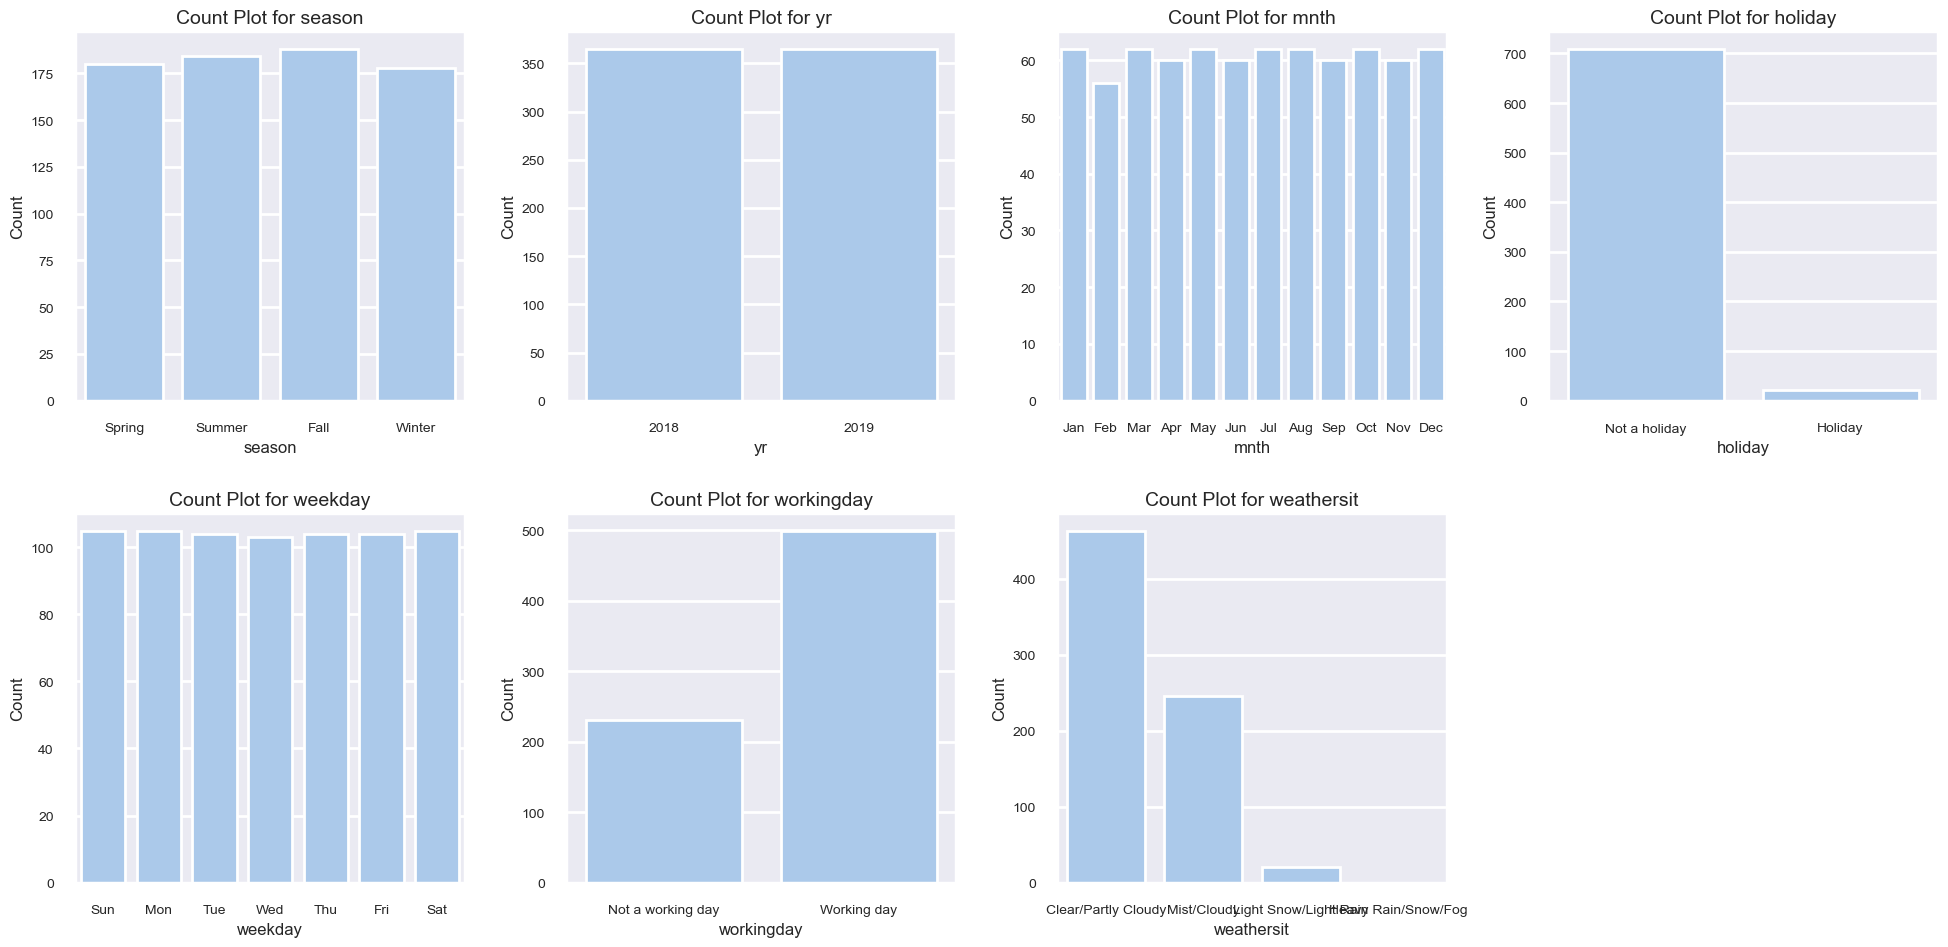

In [216]:
cat_rows = (len(cat_columns) + 3) // 4
fig, axes = plt.subplots(cat_rows, 4, figsize=(20, 5 * cat_rows))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

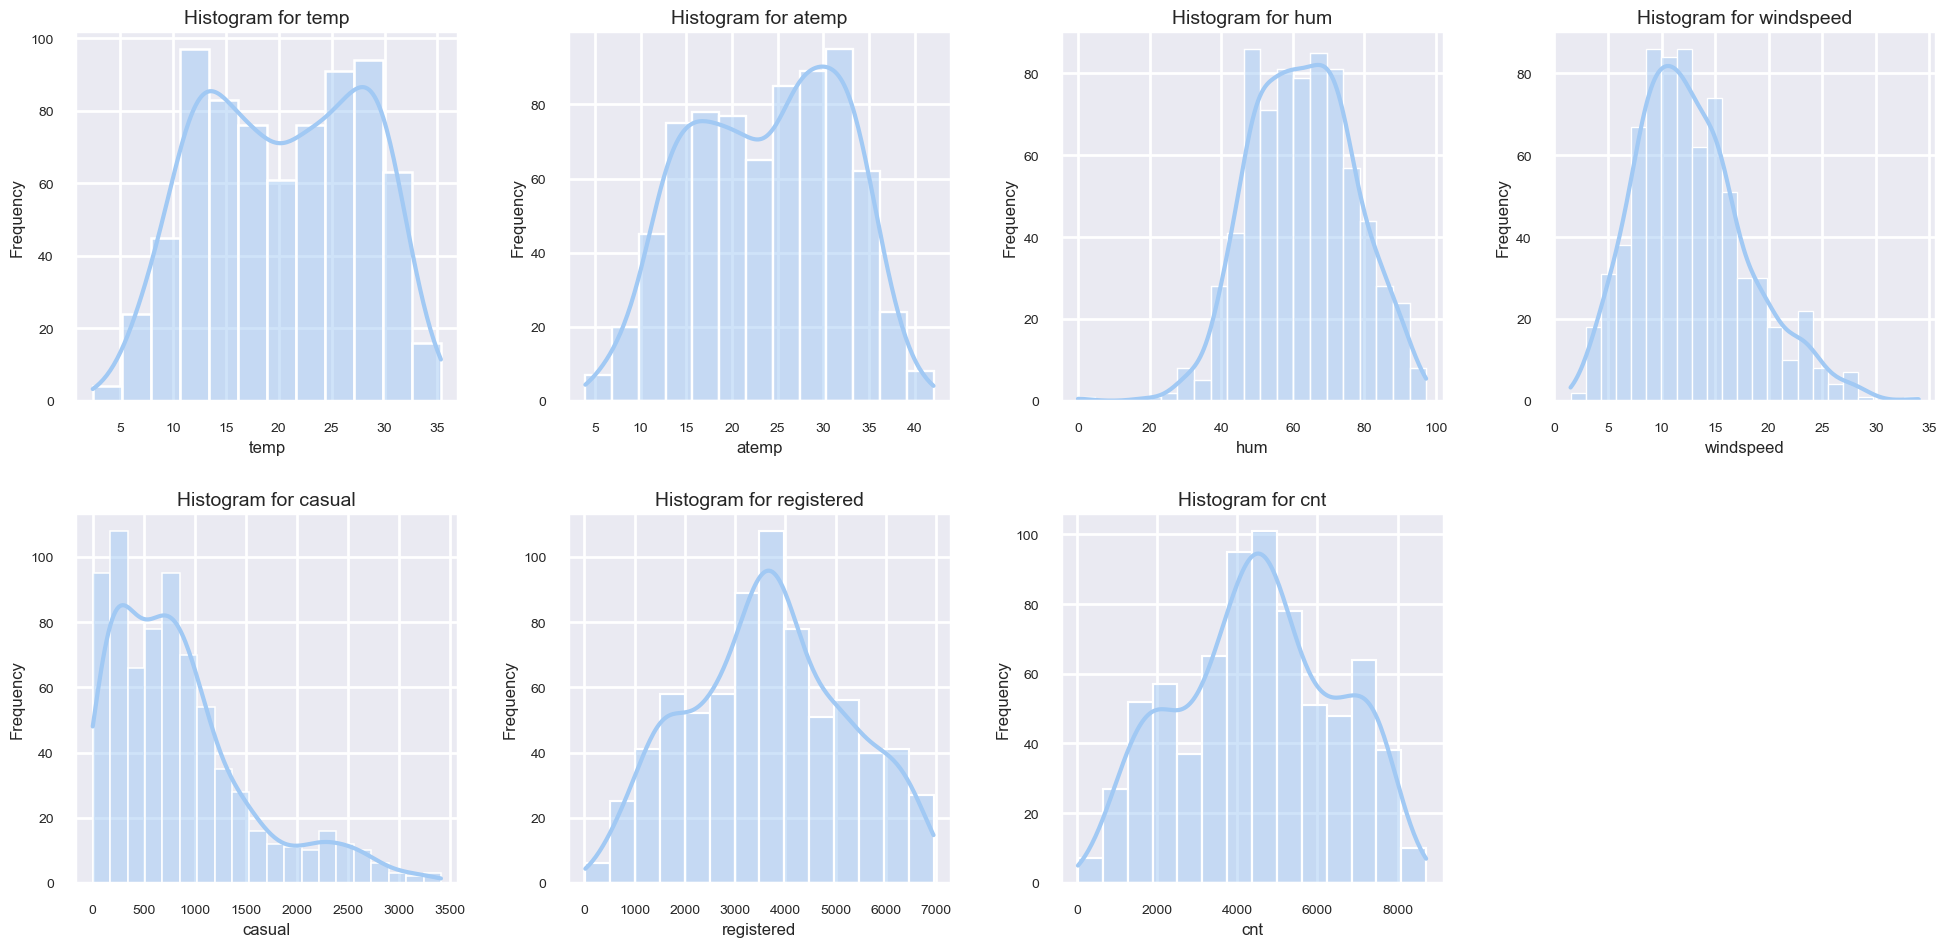

In [217]:
num_rows = (len(num_columns) + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **4.2 Bivariate Analysis**
- Examine relationships between the target variable (`cnt`) and independent numeric variables.

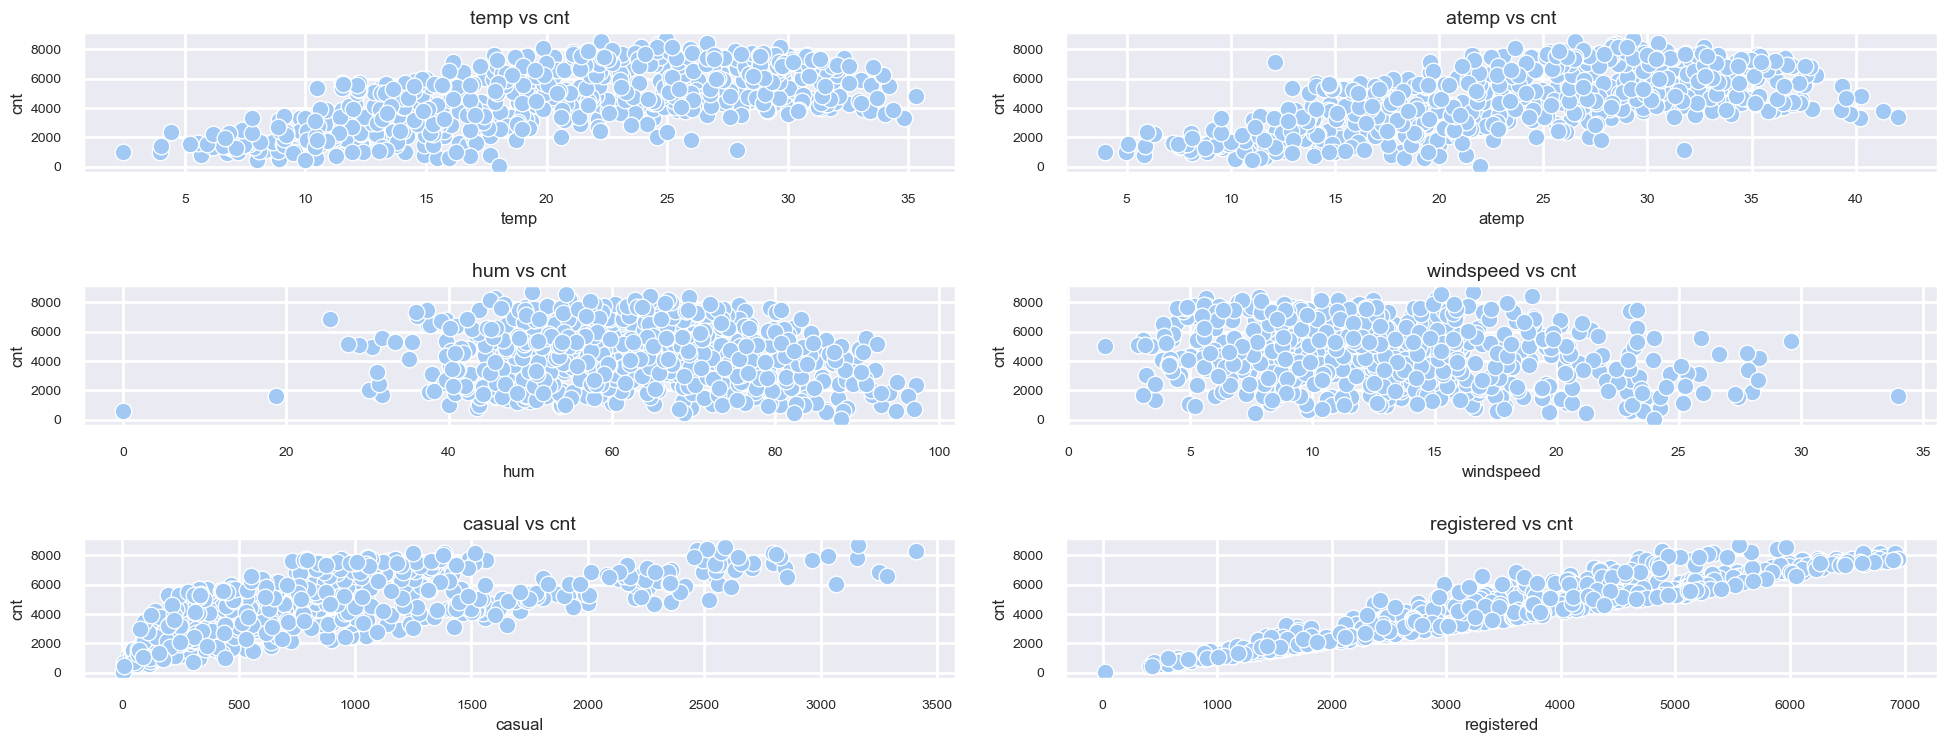

In [218]:
fig, axes = plt.subplots(len(num_columns) - 1, 2, figsize=(20, 5 * (len(num_columns) - 1) // 2))
axes = axes.flatten()

for i, col in enumerate(num_columns[:-1]): 
    sns.scatterplot(data=df, x=col, y='cnt', ax=axes[i])
    axes[i].set_title(f'{col} vs cnt')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cnt')

# Hide extra axes
for i in range(len(num_columns) - 1, len(axes)):
    axes[i].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Examine relationships between the target variable (`cnt`) and independent categorical variables.

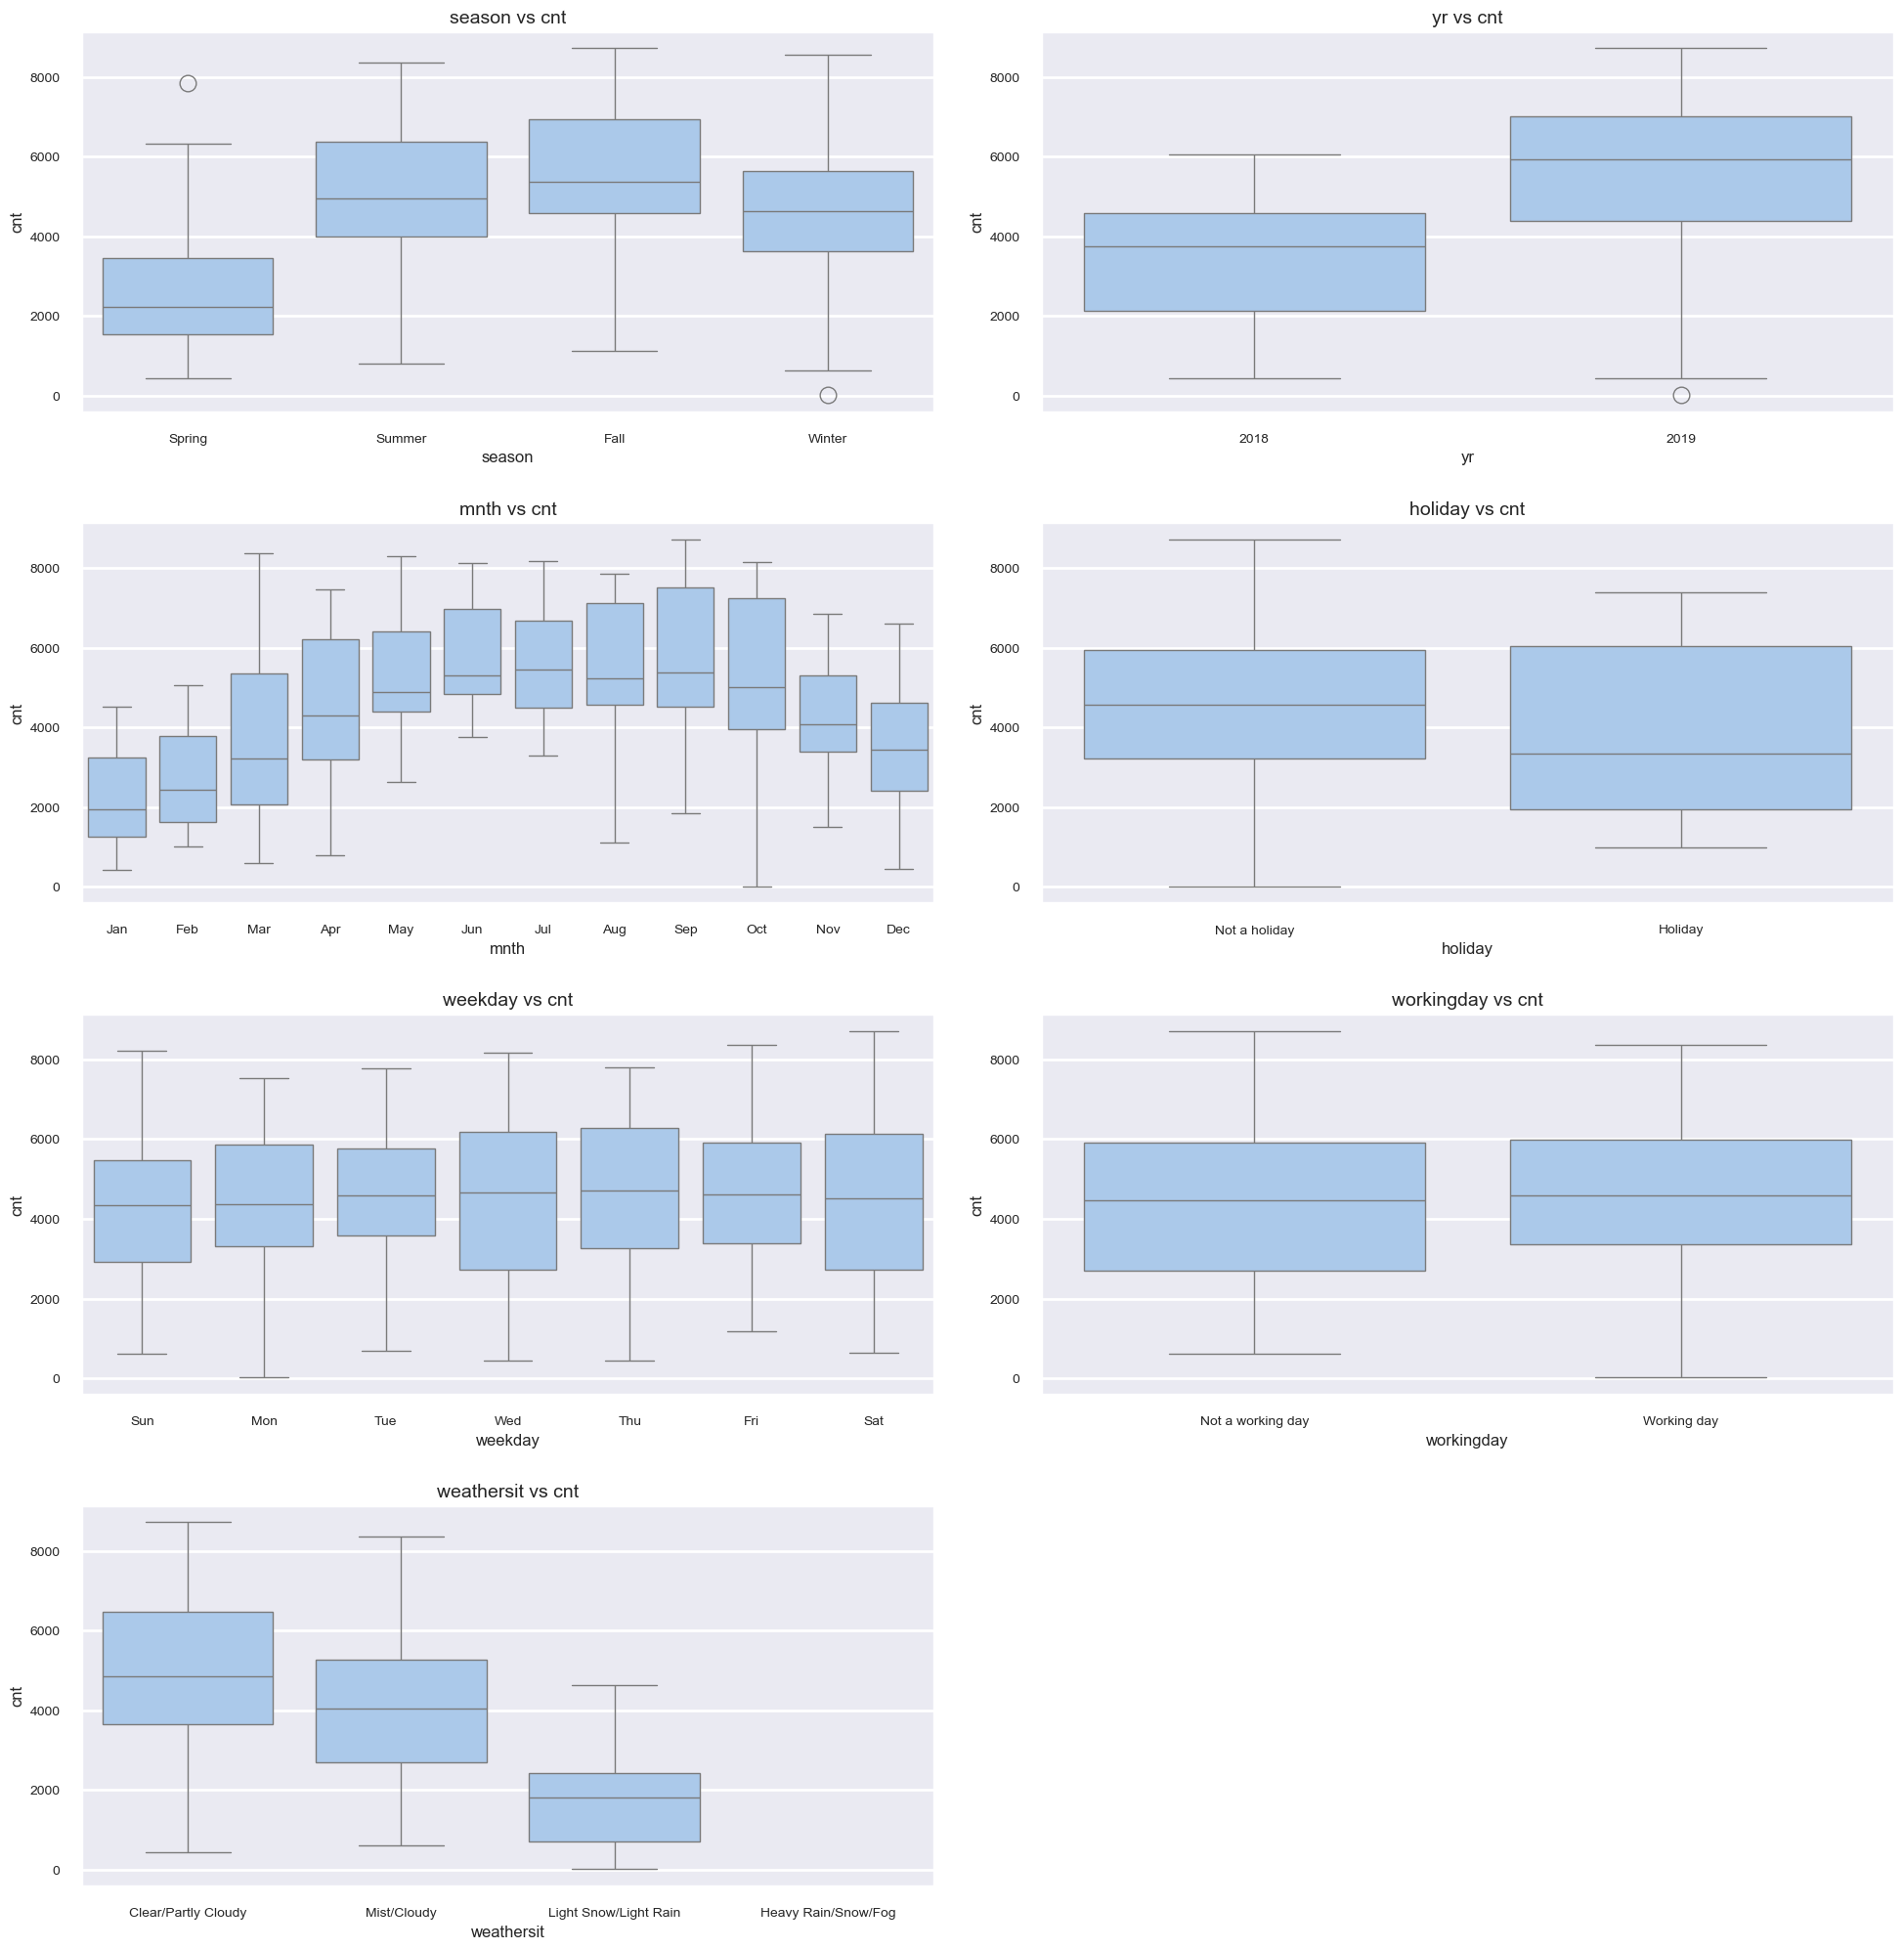

In [219]:
fig, axes = plt.subplots(len(cat_columns), 2, figsize=(20, 5 * len(cat_columns)))
axes = axes.flatten()
num_column_to_compare = 'cnt'

for i, col in enumerate(cat_columns):
    sns.boxplot(data=df, x=col, y=num_column_to_compare, ax=axes[i])
    axes[i].set_title(f'{col} vs {num_column_to_compare}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(num_column_to_compare)

# Hide extra axes
for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **4.3 Correlation Analysis**
- Create a heatmap to identify correlated variables.

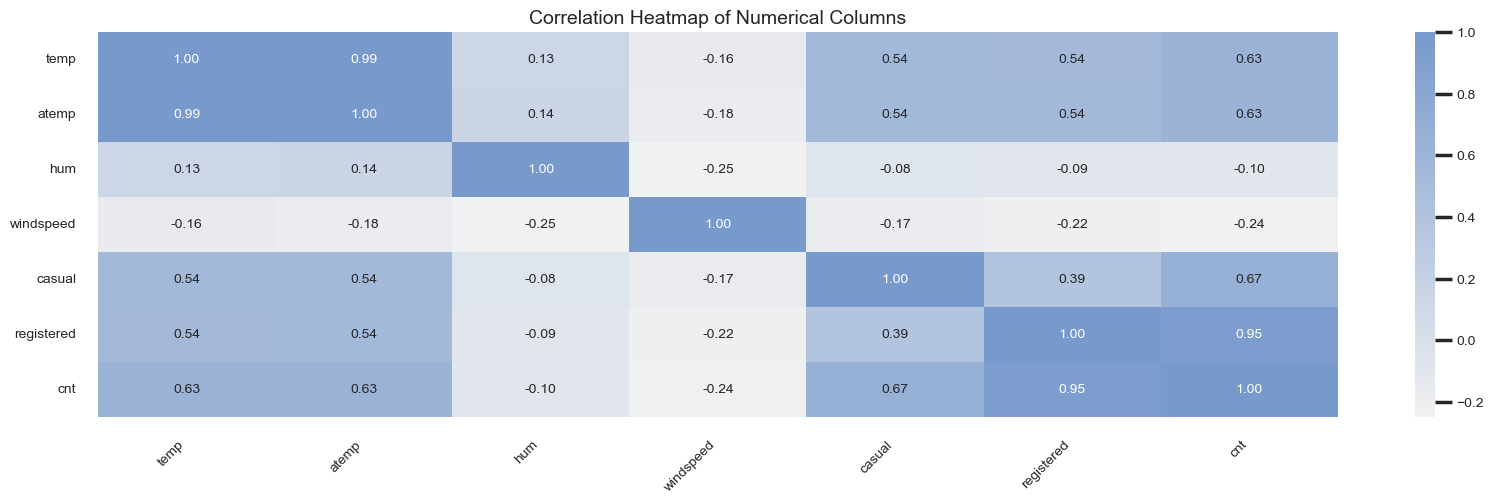

In [220]:
plt.figure(figsize=(20, 5))
correlation = df[num_columns].corr()
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10}, cmap=sns.light_palette("#79c", as_cmap=True), fmt='.2f')

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()